<p style="background-color:firebrick;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>EDA Projesi - Netflix Titles 2021</b></p>

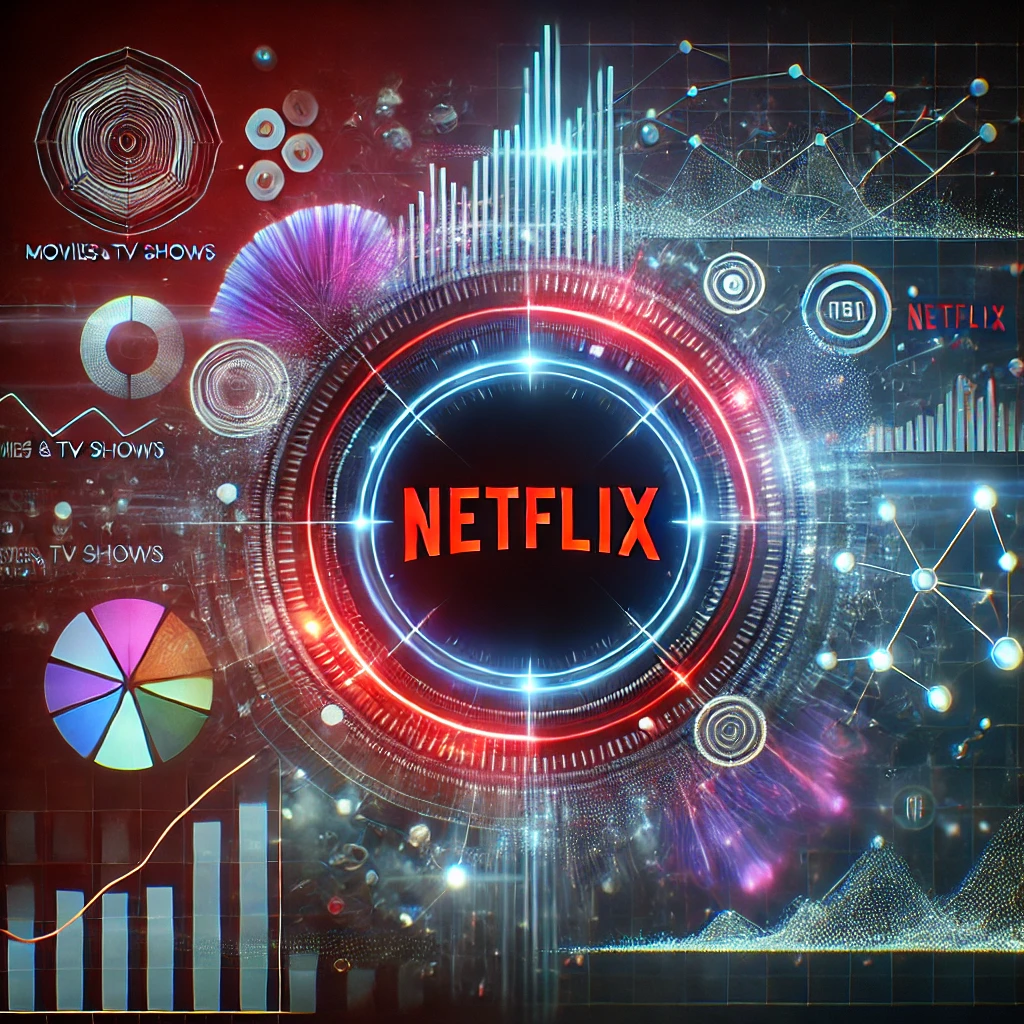

<b>İçindekiler:</b>
<ul>
<li><a href="#import-library">Kütüphanelerin Yüklenmesi</a></li>
<li><a href="#loading-dataset">Veri Setinin Yüklenmesi</a></li>
<li><a href="#understanding-dataset">Veri Setini Anlama</a></li>
<li><a href="#organizing-columns">Sütunların Düzenlenmesi</a></li>
<li><a href="#nan-values">NaN Değerler</a></li>
<li><a href="#data-visualization">Veri Görselleştirme</a></li>
</ul>

<a id='import-library'></a>
# <font color='darkred'> <b>Kütüphanelerin Yüklenmesi</b><font color='black'> 

In [5]:
# ! pip install summarytools

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno

import os

from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

from skimpy import skim

from summarytools import dfSummary

import cufflinks as cf
cf.go_offline()

from collections import Counter
import string

import folium
from folium import plugins

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

<a id='loading-dataset'></a>
# <font color='darkred'> <b>Veri Setinin Yüklenmesi</b><font color='black'> 

In [8]:
df0 = pd.read_csv("netflix_titles_2021.csv")
df = df0.copy()

In [9]:
df.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

<a id='understanding-dataset'></a>
# <font color='darkred'> <b>Veri Setini Anlama</b><font color='black'> 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [12]:
df.shape

(8807, 12)

In [13]:
df.duplicated().sum()

0

In [14]:
df.describe().T

count         mean       std     min     25%     50%     75%  \
release_year  8807.0  2014.180198  8.819312  1925.0  2013.0  2017.0  2019.0   

                 max  
release_year  2021.0

In [15]:
df.describe(include= "object").T

count unique                                                top  \
show_id      8807   8807                                                 s1   
type         8807      2                                              Movie   
title        8807   8807                               Dick Johnson Is Dead   
director     6173   4528                                      Rajiv Chilaka   
cast         7982   7692                                 David Attenborough   
country      7976    748                                      United States   
date_added   8797   1767                                    January 1, 2020   
rating       8803     17                                              TV-MA   
duration     8804    220                                           1 Season   
listed_in    8807    514                       Dramas, International Movies   
description  8807   8775  Paranormal activity at a lush, abandoned prope...   

             freq  
show_id         1  
type         6131  
title           1  
director       19  
cast           19  
country      2818  
date_added    109  
rating       3207  
duration     1793  
listed_in     362  
description     4

In [16]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

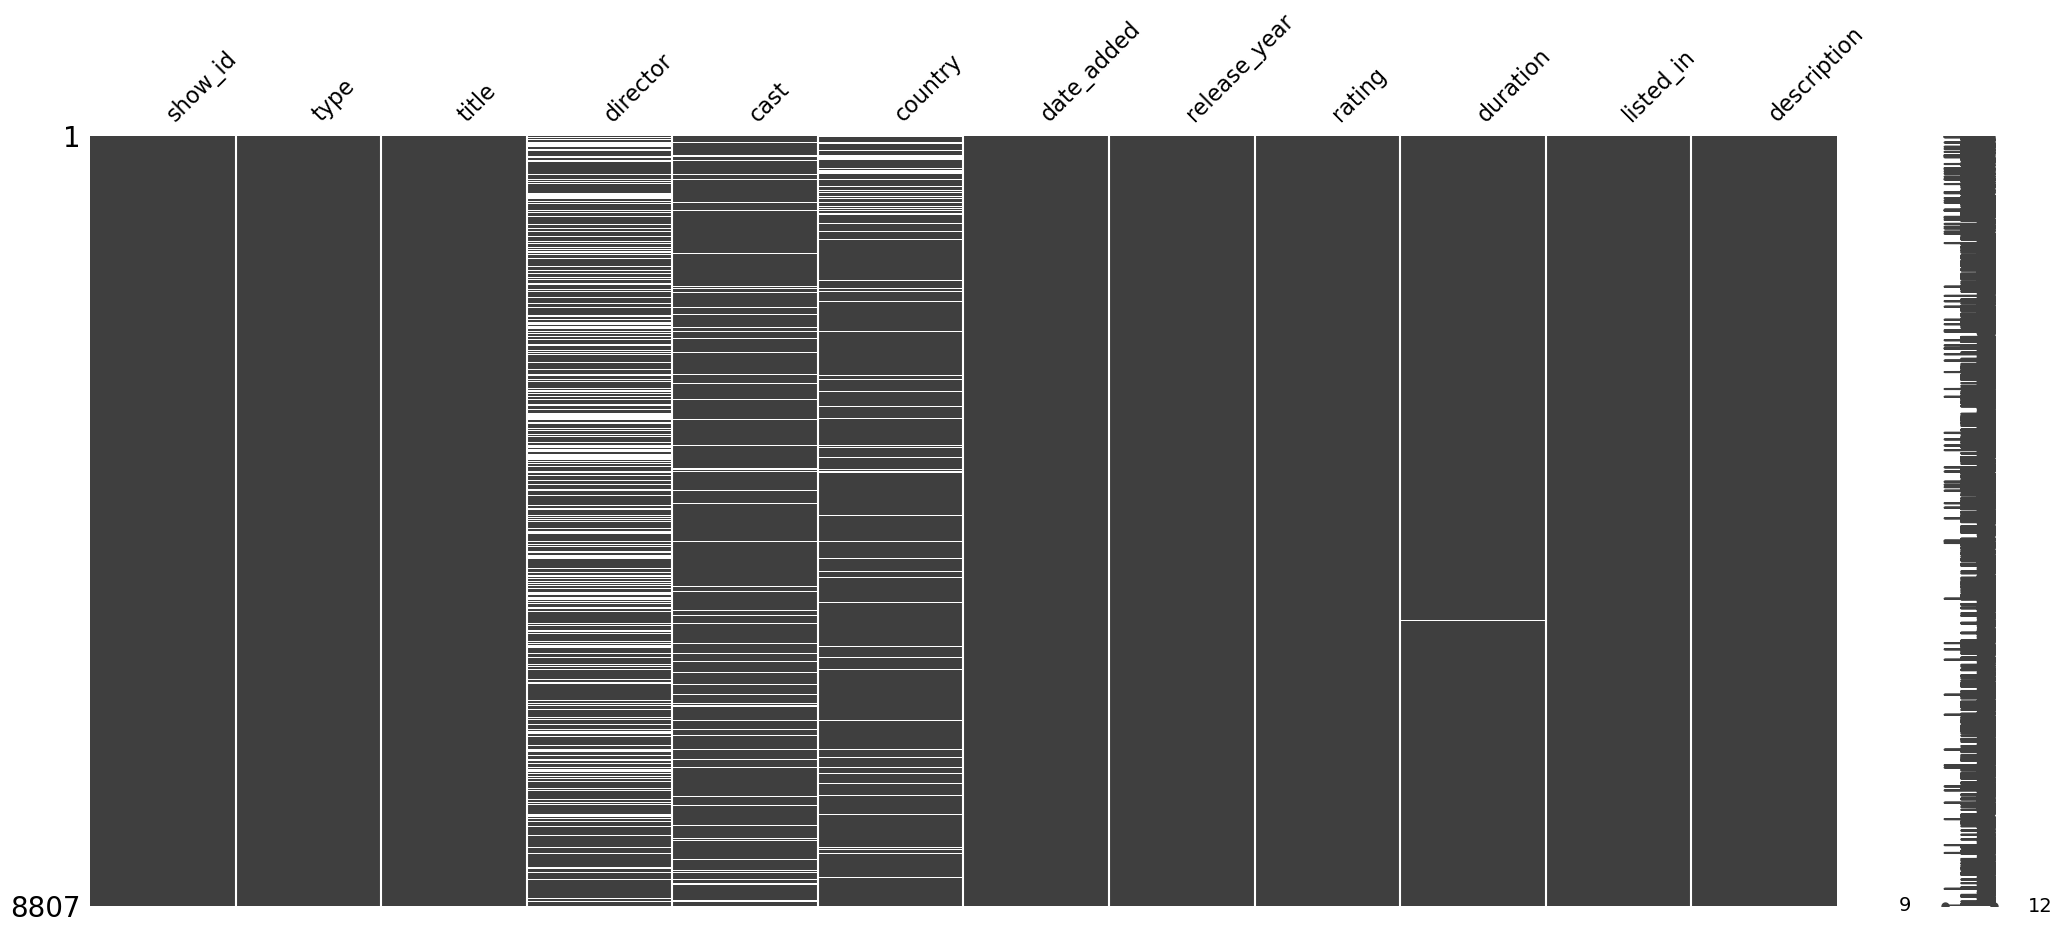

In [17]:
msno.matrix(df);

In [18]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [19]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 8807   │ │ string      │ 11    │                                                          │
│ │ Number of columns │ 12     │ │ int32       │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA   ┃ NA %   ┃ mean   ┃ sd      ┃ p0     ┃ p25    ┃ p50    ┃ p75    ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ release_year      │    0 │      0 │   2014 │   8.819 │   1925 │   2013 │   2017 │   2019 │  2021 │     ▁▇  │  │
│ └───────────────────┴──────┴────────┴────────┴─────────┴────────┴────────┴────────┴────────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name              ┃ NA         ┃ NA %         ┃ words per row              ┃ total words            ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ show_id                  │          0 │            0 │                          1 │                   8807 │  │
│ │ type                     │          0 │            0 │                        1.3 │                  11483 │  │
│ │ title                    │          0 │            0 │                        3.1 │                  27391 │  │
│ │ director                 │       2634 │        29.91 │                        1.7 │                  14691 │  │
│ │ cast                     │        825 │         9.37 │                         15 │                 132059 │  │
│ │ country                  │        831 │         9.44 │                        1.7 │                  15066 │  │
│ │ date_added               │         10 │         0.11 │                          3 │                  26479 │  │
│ │ rating                   │          4 │         0.05 │                          1 │                   8806 │  │
│ │ duration                 │          3 │         0.03 │                          2 │                  17608 │  │
│ │ listed_in                │          0 │            0 │                        4.5 │                  39221 │  │
│ │ description              │          0 │            0 │                         24 │                 210327 │  │
│ └──────────────────────────┴────────────┴──────────────┴────────────────────────────┴────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [20]:
df.sample(5)

show_id     type                 title         director  \
1763   s1764    Movie              Piercing    Nicolas Pesce   
2986   s2987    Movie      Sillu Karuppatti  Halitha Shameem   
263     s264  TV Show     Mother Goose Club              NaN   
8315   s8316  TV Show  The Furchester Hotel              NaN   
6871   s6872  TV Show              Gomorrah              NaN   

                                                   cast  \
1763  Christopher Abbott, Mia Wasikowska, Laia Costa...   
2986  Nivedhithaa Sathish, Leela Samson, Samuthiraka...   
263                                                 NaN   
8315  Sarah Burgess, Ryan Dillon, Louise Gold, David...   
6871  Marco D'Amore, Fortunato Cerlino, Salvatore Es...   

                            country         date_added  release_year rating  \
1763                  United States   November 1, 2020          2018      R   
2986                          India   January 26, 2020          2019  TV-14   
263                   United States    August 16, 2021          2016   TV-Y   
8315  United Kingdom, United States   February 1, 2017          2015   TV-Y   
6871                 Italy, Germany    August 21, 2017          2016  TV-MA   

       duration                                          listed_in  \
1763     81 min              Dramas, Independent Movies, Thrillers   
2986    133 min               Comedies, Dramas, Independent Movies   
263   2 Seasons                                           Kids' TV   
8315  2 Seasons                         British TV Shows, Kids' TV   
6871  2 Seasons  Crime TV Shows, International TV Shows, TV Dramas   

                                            description  
1763  A family man plots to kill a spellbinding sex ...  
2986  From first crushes to post-marriage relationsh...  
263   Classic nursery rhymes and children's songs ge...  
8315  Elmo hops across the pond to help his extended...  
6871  Mafia activity in Naples is at the center of t...

<a id='organizing-columns'></a>
# <font color='darkred'> <b>Sütunların Düzenlenmesi</b><font color='black'> 

In [22]:
# sütunlardaki boşlukları kaldır
df["type"] = df["type"].str.strip()
df["title"] = df["title"].str.strip()
df["director"] = df["director"].str.strip()
df["cast"] = df["cast"].str.strip()
df["country"] = df["country"].str.strip()
df["date_added"] = df["date_added"].str.strip()
df["rating"] = df["rating"].str.strip()
df["duration"] = df["duration"].str.strip()
df["listed_in"] = df["listed_in"].str.strip()

## <font color='indianred'> <b>data_added Sütunu</b><font color='black'> 

In [24]:
# data_added sütununun dtype'ını datetime'a çevirme
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')

## <font color='indianred'> <b>rating Sütunu</b><font color='black'> 

In [26]:
df.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [27]:
# '74 min', '84 min', '66 min' değerlerini silme işlemi
df = df[~df['rating'].str.contains('min', na=False)]

In [28]:
df.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', nan, 'TV-Y7-FV', 'UR'], dtype=object)

## <font color='indianred'> <b>description Sütunu</b><font color='black'> 

Bu projede kullanılmayacağı için description sütununu veri setinden silebiliriz.

In [31]:
df = df.drop(columns=['description'])

In [32]:
df.sample(5)

show_id     type                               title          director  \
7200   s7201    Movie  Kill Hitler! The Luck of the Devil  Frédéric Tonolli   
3883   s3884  TV Show                       The Outsiders               NaN   
1708   s1709  TV Show                               Ethos               NaN   
7274   s7275    Movie                           Leap Year      Anand Tucker   
915     s916    Movie       And Tomorrow the Entire World   Julia von Heinz   

                                                   cast  \
7200                             Jean-Baptiste Marcenac   
3883  Dylan Kuo, Ady An, Lan Cheng-Lung, Michael Cha...   
1708  Öykü Karayel, Fatih Artman, Funda Eryiğit, Def...   
7274  Amy Adams, Matthew Goode, Adam Scott, John Lit...   
915   Mala Emde, Noah Saavedra, Tonio Schneider, Lui...   

                     country date_added  release_year rating  duration  \
7200                  France 2019-05-01          2015  TV-14    53 min   
3883                  Taiwan 2019-04-30          2004  TV-MA  1 Season   
1708                  Turkey 2020-11-12          2020  TV-MA  1 Season   
7274  United States, Ireland 2019-11-15          2010     PG   100 min   
915          Germany, France 2021-05-06          2020  TV-MA   112 min   

                                              listed_in  
7200                Documentaries, International Movies  
3883  Crime TV Shows, International TV Shows, Romant...  
1708                  International TV Shows, TV Dramas  
7274                          Comedies, Romantic Movies  
915             Dramas, International Movies, Thrillers

<a id='nan-values'></a>
# <font color='darkred'> <b>NaN Değerler</b><font color='black'> 

In [34]:
df['director'] = df['director'].fillna('Unknown')

In [35]:
df['cast'] = df['cast'].fillna('Unknown')

In [36]:
df['country'] = df['country'].fillna('Unknown')

In [37]:
df['date_added'] = df['date_added'].fillna('Unknown')

In [38]:
df['rating'] = df['rating'].fillna('Unknown')

In [39]:
df['duration'] = df['duration'].fillna('Unknown')

In [131]:
# df'nin son sürümünü csv dosyası olarak kaydetme
# df.to_csv("edited_netflix_data.csv", index= False)

<a id='data-visualization'></a>
# <font color='darkred'> <b>Veri Görselleştirme</b><font color='black'> 

## <font color='indianred'> <b>Film - Dizi Dağılımı</b><font color='black'> 

In [43]:
df.type.value_counts()

type
Movie      6128
TV Show    2676
Name: count, dtype: int64

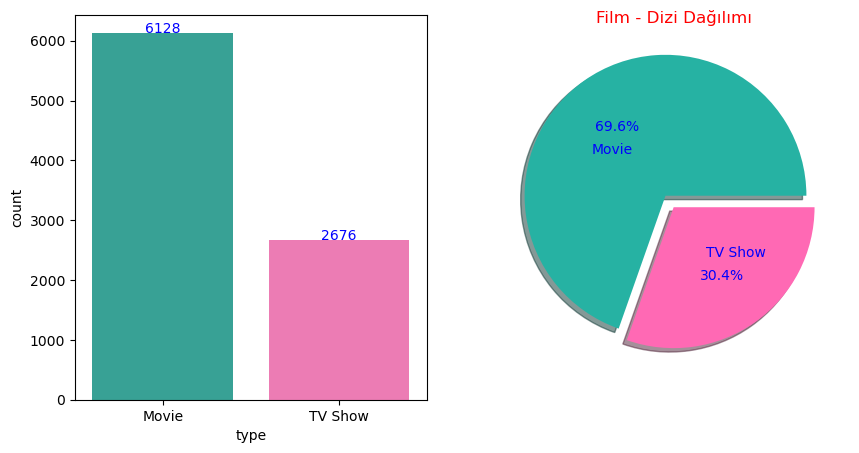

In [44]:
color_list = ["#26b2a3", "hotpink"]
explode_list = [0.1, 0]

fig, ax = plt.subplots(1, 2, figsize = (10, 5))

sns.countplot(data = df, x = "type", ax = ax[0], palette = color_list)
plt.pie(df.type.value_counts(), labels = df.type.unique(), pctdistance = 0.6, labeldistance = 0.4,
         autopct = '%1.1f%%', shadow = True, colors= color_list, explode = explode_list, textprops={'color': 'blue'})

plt.title('Film - Dizi Dağılımı', color = 'red')

for p in ax[0].patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    ax[0].annotate(
        f"{int(height)}",
        (x, height + 1),
        ha='center',
        color='blue',
        fontsize=10
    )
    
plt.show()

## <font color='indianred'> <b>Yıllara Göre Film - Dizi Dağılımı</b><font color='black'> 

In [46]:
# Tarih sütununu gün, ay ve yıla bölme
# Tarih Örneği: 'January 8, 2018' 
# format = `format="%B %d, %Y`

df['date_added'] = pd.to_datetime(df['date_added'], format="%B %d, %Y", errors='coerce') 

df['year'] = df['date_added'].dt.year.fillna(0).astype(int)
df['month'] = df['date_added'].dt.month.fillna(0).astype(int)
df['day'] = df['date_added'].dt.day.fillna(0).astype(int)

df_grouped = df[df.year > 0].groupby(['year', 'type']).size().reset_index(name='count').sort_values("year")
df_grouped

year     type  count
0   2008    Movie      1
1   2008  TV Show      1
2   2009    Movie      2
3   2010    Movie      1
4   2011    Movie     13
5   2012    Movie      3
6   2013    Movie      6
7   2013  TV Show      5
8   2014    Movie     19
9   2014  TV Show      5
11  2015  TV Show     26
10  2015    Movie     56
12  2016    Movie    251
13  2016  TV Show    176
14  2017    Movie    838
15  2017  TV Show    349
16  2018    Movie   1237
17  2018  TV Show    412
18  2019    Movie   1424
19  2019  TV Show    592
20  2020    Movie   1284
21  2020  TV Show    595
22  2021    Movie    993
23  2021  TV Show    505

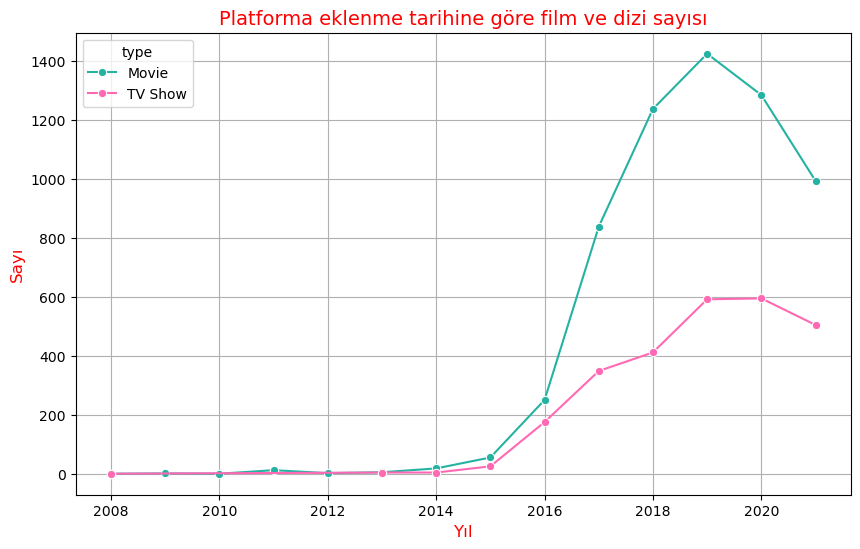

In [47]:
color_list = ["#26b2a3", "hotpink"]

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_grouped, x='year', y='count', hue='type', marker='o', palette=color_list)

plt.title('Platforma eklenme tarihine göre film ve dizi sayısı', color= 'red',fontsize=14)
plt.xlabel('Yıl', color= 'red', fontsize=12)
plt.ylabel('Sayı', color= 'red', fontsize=12)
plt.grid(True)
plt.show()

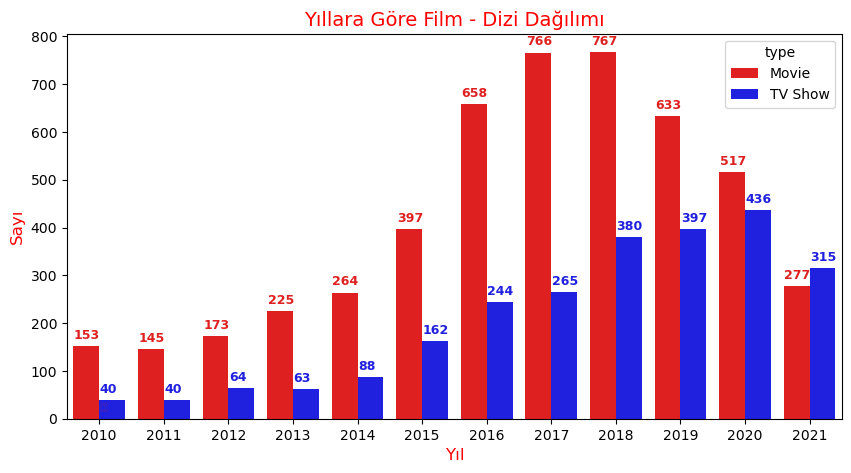

In [48]:
fig, ax = plt.subplots(figsize = (10, 5))

ax = sns.countplot(x = "release_year", hue = "type", data = df[df.release_year >= 2010], palette=["red", "blue"])

plt.title('Yıllara Göre Film - Dizi Dağılımı', color='red', fontsize=14)

for p in ax.patches:
    bar_color = p.get_facecolor()

    ax.annotate(f"{int(p.get_height())}", (p.get_x() + 0.01, p.get_height() + 15), fontsize=9, color=bar_color, fontweight='bold')
plt.xlabel('Yıl', color='red', fontsize=12)
plt.ylabel('Sayı', color='red', fontsize=12)
plt.show()

## <font color='indianred'> <b>Film ve Diziler Hangi Sezonda Daha Çok Yayınlanıyor?</b><font color='black'> 

In [50]:
df['season'] = df['month'].apply(lambda x: 
                                 "kış" if x in [12, 1, 2] else 
                                 "ilkbahar" if x in [3, 4, 5] else 
                                 "yaz" if x in [6, 7, 8] else 
                                 "sonbahar")

df.season.value_counts()

season
yaz         2309
sonbahar    2244
ilkbahar    2137
kış         2114
Name: count, dtype: int64

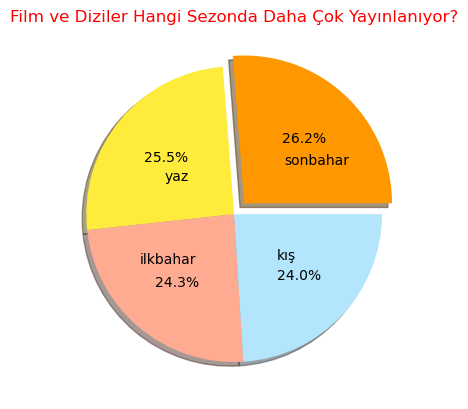

In [51]:
color_list = ["#FF9800", "#FFEB3B", "#FFAB91", "#B3E5FC"]

plt.pie(df.season.value_counts(), labels = df.season.unique(), pctdistance = 0.6, labeldistance = 0.4,
        autopct = '%1.1f%%', shadow = True, 
        colors = color_list, explode = [0.1, 0, 0, 0], textprops={'color': 'black'})

plt.title('Film ve Diziler Hangi Sezonda Daha Çok Yayınlanıyor?', color= 'red')
    
plt.show()

## <font color='indianred'> <b>En Çok Film veya Dizide Rol Alan 5 Oyuncu</b><font color='black'> 

In [53]:
top5_actors = df["cast"].str.split(", ", expand=True).stack().value_counts()[1:6]
top5_actors

Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Takahiro Sakurai    32
Naseeruddin Shah    32
Name: count, dtype: int64

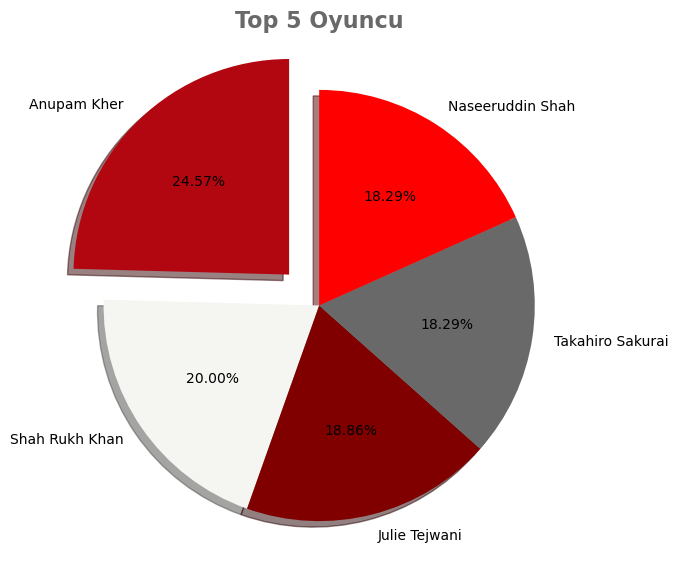

In [54]:
fig, ax = plt.subplots(figsize=(7, 7))

ax.pie(top5_actors.values, labels=top5_actors.index, autopct='%1.2f%%',
       startangle=90,
       shadow= 0.2,
       colors= ['#b20710', '#f5f5f1', "maroon", "dimgray", "red"],
       explode= (0.2, 0, 0, 0, 0),
       textprops={'color': 'black'}
      )

ax.set_title('Top 5 Oyuncu', fontsize=16, fontweight='bold', color= 'dimgrey')

plt.show()

## <font color='indianred'> <b>Film/Dizi İsimlerinde Geçen Kelimeler İle Kelime Bulutu Oluşturma</b><font color='black'> 

In [56]:
title_text = ' '.join(df[df.cast != "Unknown"].title)

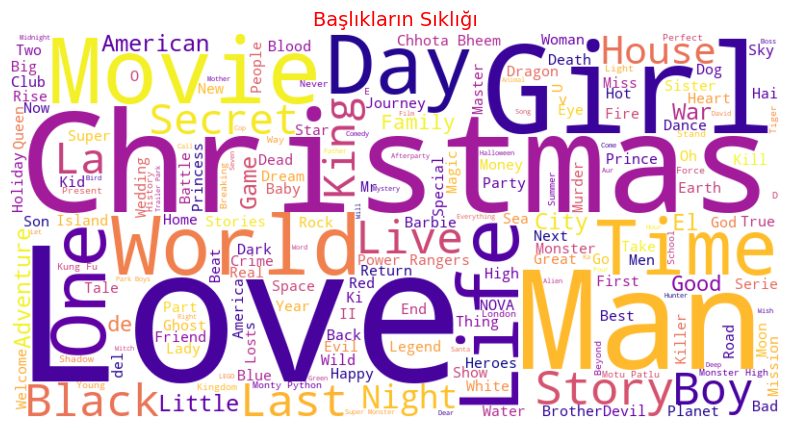

In [57]:
# WordCloud oluşturma
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='plasma').generate(title_text)

# Grafik ayarlarını özelleştirme
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Başlıkların Sıklığı', color='red', fontsize= 14)
plt.show()

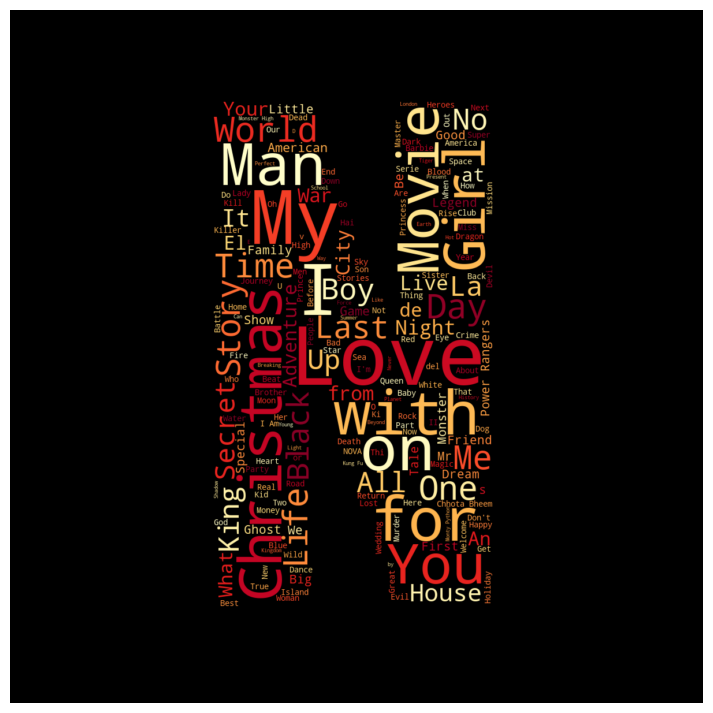

In [58]:
# 'N' harfi logosunu maskeye dönüştürün
netflix_mask = np.array(Image.open('netflix_logo.jpg').convert('L'))
netflix_mask = np.invert(netflix_mask)

# Başlıklardan "a, the, and" vb. kelimeleri hariç tutma işlemi
custom_stopwords = {'a', 'the', 'and', 'in', 'of', 'to'}

# Maskedeki beyaz alanların belirlenmesi
netflix_mask[netflix_mask > 128] = 255  # Beyaz alanlar
netflix_mask[netflix_mask <= 128] = 0 # Siyah alanlar

# WordCloud oluşturma
wc = WordCloud(background_color='black', mask=netflix_mask, contour_width=1, 
               contour_color='black', colormap='YlOrRd', stopwords=custom_stopwords.union({'Netflix'})).generate(title_text)

# WordCloud'u çıktı olarak gösterme
plt.figure(figsize=(9, 9))
plt.axis("off")
plt.imshow(wc, interpolation='bilinear')
plt.show()

## <font color='indianred'> <b>Rating Dağılımı</b><font color='black'> 

In [60]:
df['rating'].value_counts().head(11)

rating
TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
NR         80
G          41
Name: count, dtype: int64

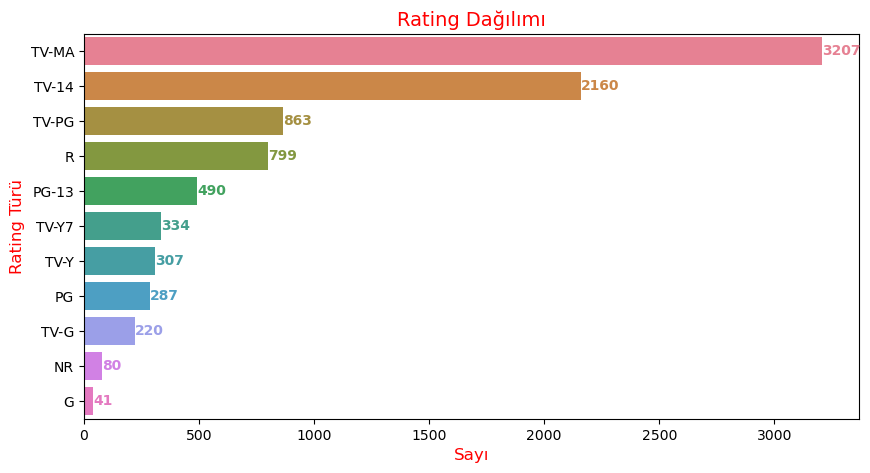

In [61]:
order = df['rating'].value_counts().head(11).index

fig, ax = plt.subplots(figsize = (10, 5))

sns.countplot(data = df, y = "rating", palette = "husl", order = order)

plt.title('Rating Dağılımı', color='red', fontsize=14)

for p in ax.patches:
    ax.annotate(f"{int(p.get_width())}", (p.get_width() + 1, p.get_y() + 0.5), fontsize=10, color=p.get_facecolor(), fontweight='bold')
plt.ylabel('Rating Türü', color='red', fontsize=12)
plt.xlabel('Sayı', color='red', fontsize=12)
plt.show()

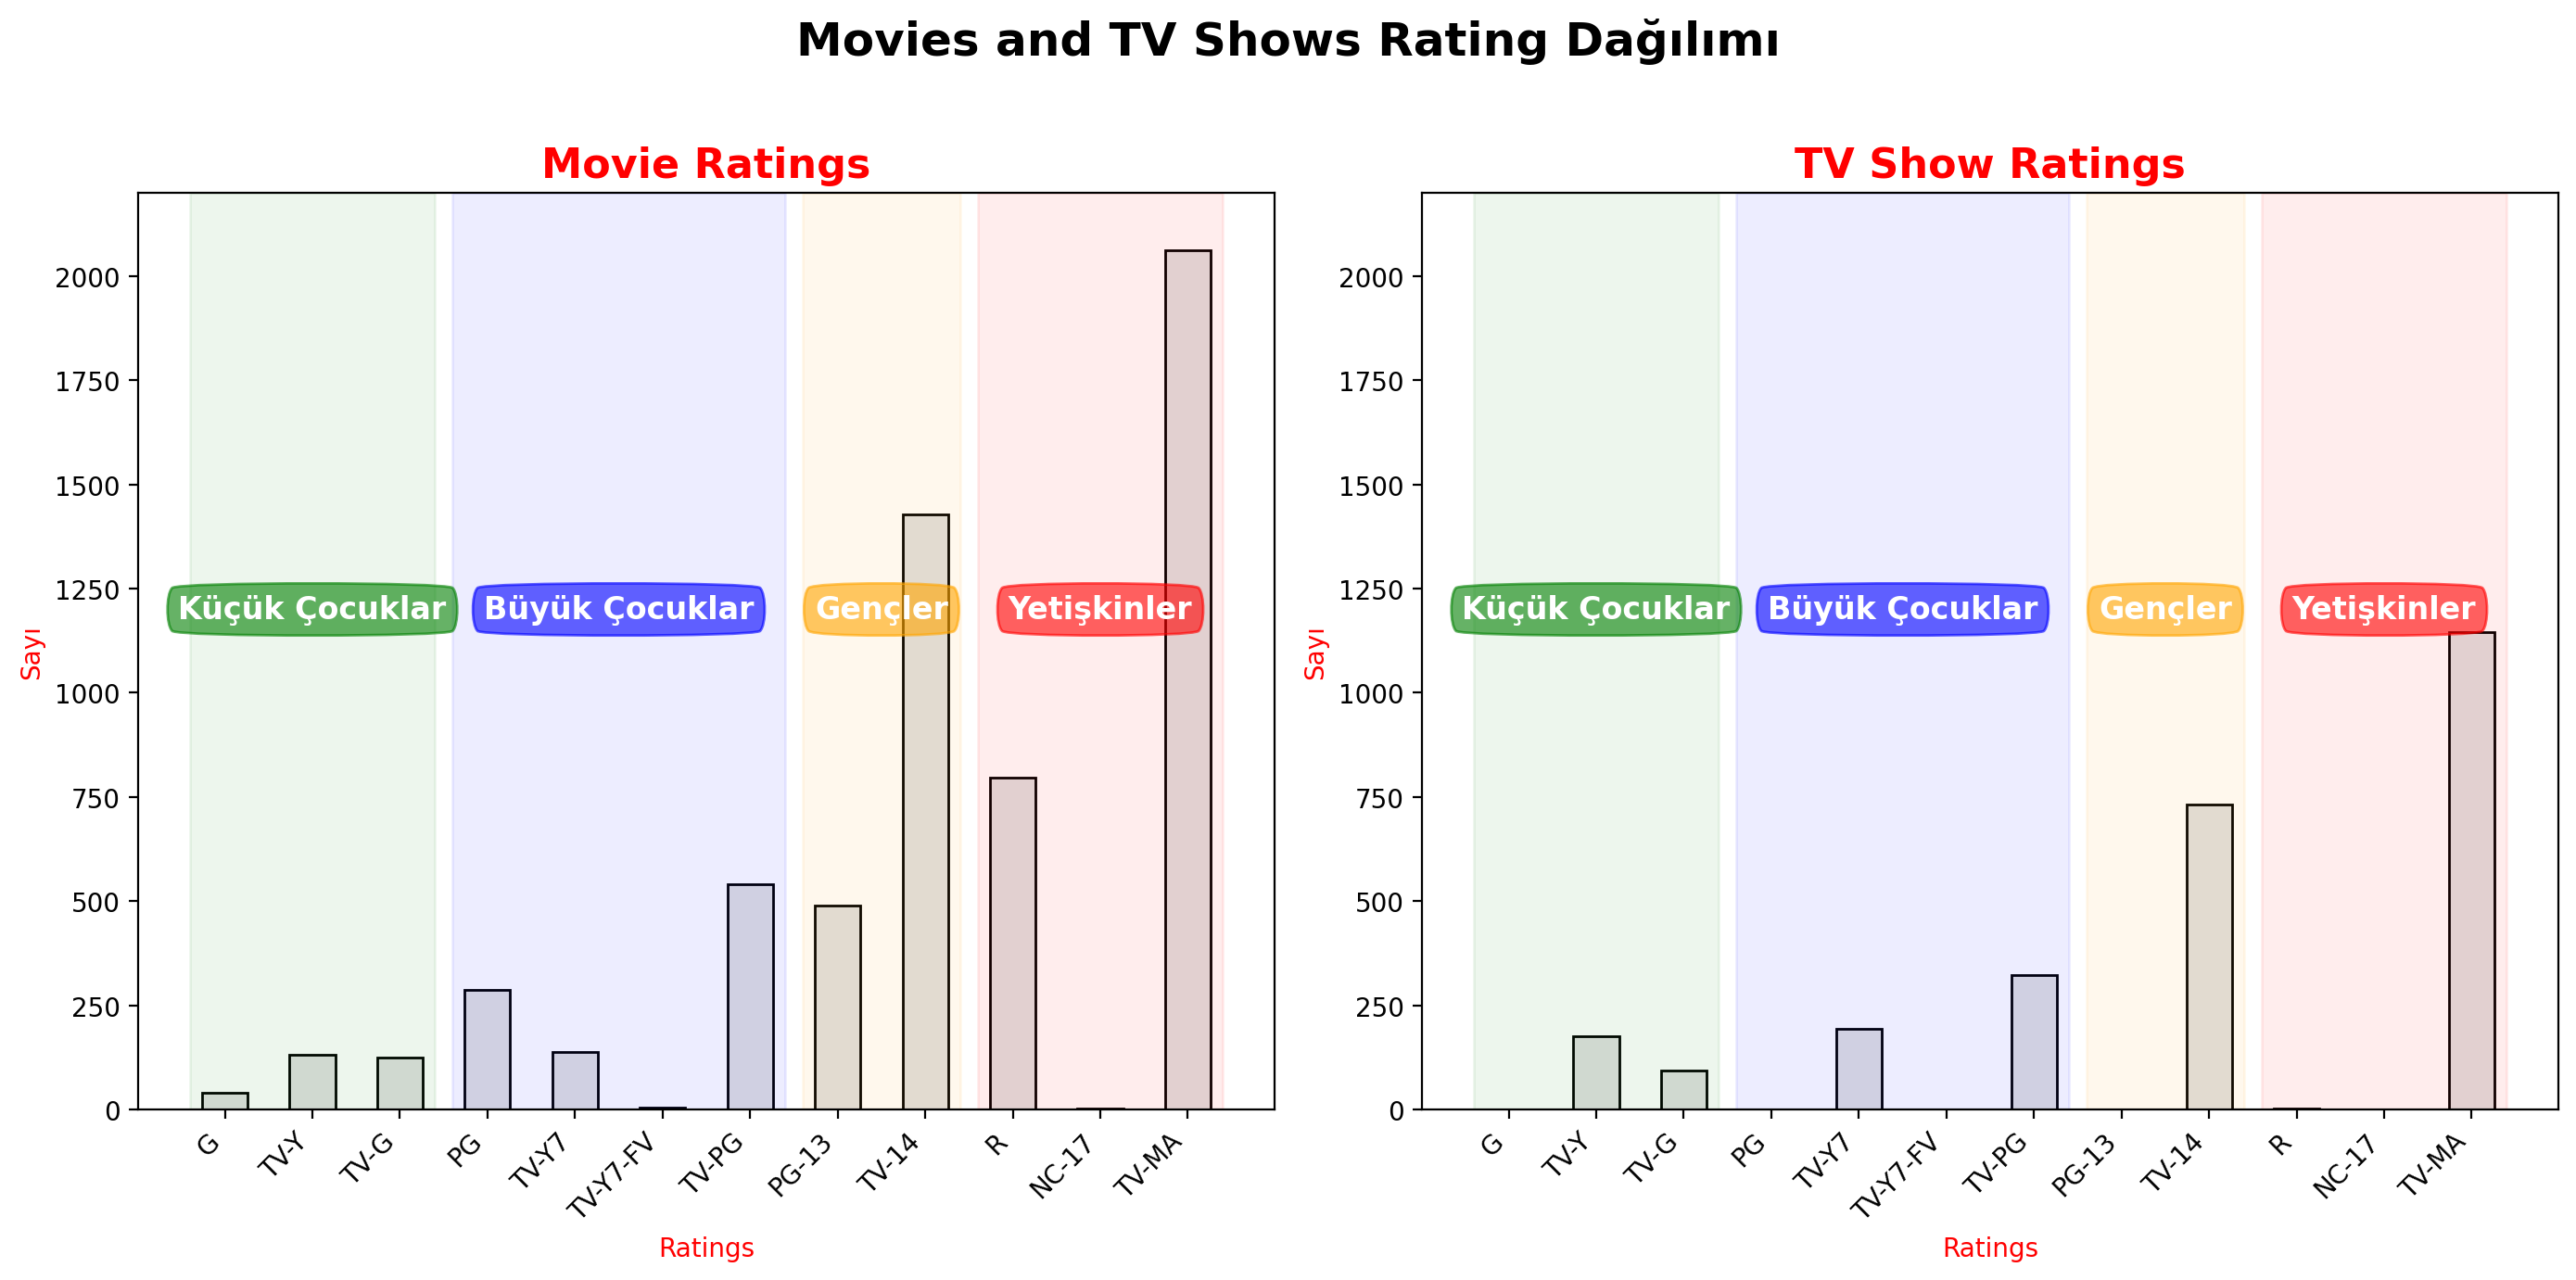

In [62]:
# Film ve TV şovu verilerini ayırma işlemi
movie = df[df['type'] == 'Movie']
series = df[df['type'] == 'TV Show']

rating_order = ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']

# Film ve TV şovu derecelendirmelerini sayma işlemi
movie_rating = movie['rating'].value_counts()
tv_show_rating = series['rating'].value_counts()

# Kategorileri yeniden indeksleyin (0 değerini atayın)
movie_rating = movie_rating.reindex(rating_order, fill_value=0)
tv_show_rating = tv_show_rating.reindex(rating_order, fill_value=0)

def rating_barplot(movie_data, tv_data, title, height, h_lim=None):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7), dpi=200)

    # Movie bar grafiği
    if h_lim:
        ax1.set_ylim(0, h_lim)
    ax1.bar(movie_data.index, movie_data, color="#e0e0e0", width=0.52, edgecolor='black')

    color = ['green', 'blue', 'orange', 'red']
    span_range = [[0, 2], [3, 6], [7, 8], [9, 11]]

    for idx, sub_title in enumerate(['Küçük Çocuklar', 'Büyük Çocuklar', 'Gençler', 'Yetişkinler']):
        ax1.annotate(sub_title,
                     xy=(sum(span_range[idx]) / 2, height),
                     xytext=(0, 0), textcoords='offset points',
                     va="center", ha="center",
                     color="w", fontsize=12, fontweight='bold',
                     bbox=dict(boxstyle='round4', pad=0.4, color=color[idx], alpha=0.6))
        ax1.axvspan(span_range[idx][0] - 0.4, span_range[idx][1] + 0.4, color=color[idx], alpha=0.07)

    ax1.set_title(f'Movie Ratings', fontsize=16, fontweight='bold', color='red')
    ax1.set_xlabel('Ratings', color='red')
    ax1.set_ylabel('Sayı', color='red')

    # TV show bar grafiği
    if h_lim:
        ax2.set_ylim(0, h_lim)
    ax2.bar(tv_data.index, tv_data, color="#e0e0e0", width=0.52, edgecolor='black')

    for idx, sub_title in enumerate(['Küçük Çocuklar', 'Büyük Çocuklar', 'Gençler', 'Yetişkinler']):
        ax2.annotate(sub_title,
                     xy=(sum(span_range[idx]) / 2, height),
                     xytext=(0, 0), textcoords='offset points',
                     va="center", ha="center",
                     color="w", fontsize=12, fontweight='bold',
                     bbox=dict(boxstyle='round4', pad=0.4, color=color[idx], alpha=0.6))
        ax2.axvspan(span_range[idx][0] - 0.4, span_range[idx][1] + 0.4, color=color[idx], alpha=0.07)

    ax2.set_title(f'TV Show Ratings', fontsize=16, fontweight='bold', color='red',)
    ax2.set_xlabel('Ratings', color='red')
    ax2.set_ylabel('Sayı', color='red')
    
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')
    plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')
    
    plt.suptitle(f'{title} Rating Dağılımı', fontsize=18, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Fonksiyonu çağırma
rating_barplot(movie_rating, tv_show_rating, 'Movies and TV Shows', 1200, 2200)

## <font color='indianred'> <b>Ülkelere Göre Film - Dizi Dağılımı</b><font color='black'> 

### <font color='firebrick'> <b>Folium Kullanarak</b><font color='black'> 

In [65]:
mapList = pd.read_csv("https://raw.githubusercontent.com/brian-cuny/migrantdata/master/country_locations.csv")
mapList.head(5)

country   latitude  longitude                  name
0      AD  42.546245   1.601554               Andorra
1      AE  23.424076  53.847818  United Arab Emirates
2      AF  33.939110  67.709953           Afghanistan
3      AG  17.060816 -61.796428   Antigua and Barbuda
4      AI  18.220554 -63.068615              Anguilla

In [66]:
type_counts = df[df.country != "Unknown"].groupby(['country', 'type']).size().unstack(fill_value=0).reset_index().sort_values("Movie", ascending=False).head(10)
type_counts

type         country  Movie  TV Show
603    United States   2055      760
251            India    893       79
506   United Kingdom    206      213
58            Canada    122       59
444            Spain     97       48
150            Egypt     92       14
368          Nigeria     86        9
272        Indonesia     77        2
319            Japan     76      169
492           Turkey     76       29

In [67]:
country_coords = mapList[mapList['name'].isin(type_counts.loc[:,"country"])]
country_coords = country_coords[['name', 'latitude', 'longitude']]
country_coords

name   latitude   longitude
35           Canada  56.130366 -106.346771
61            Egypt  26.820553   30.802498
64            Spain  40.463667   -3.749220
73   United Kingdom  55.378051   -3.435973
98        Indonesia  -0.789275  113.921327
102           India  20.593684   78.962880
111           Japan  36.204824  138.252924
160         Nigeria   9.081999    8.675277
219          Turkey  38.963745   35.243322
227   United States  37.090240  -95.712891

In [68]:
# map oluşturma
m = folium.Map(location=[20,0], zoom_start=2)

# Tür sayılarını ülkeye göre koordinatlara ekleyin.
for _, row in country_coords.iterrows():
    country = row['name']
    latitude = row['latitude']
    longitude = row['longitude']
    
    # Ülkeye göre tür sayılarını alın
    type_counts_row = type_counts[type_counts['country'] == country]
    movie_count = type_counts_row['Movie'].values[0] if 'Movie' in type_counts_row.columns else 0
    tv_shows_count = type_counts_row['TV Show'].values[0] if 'TV Show' in type_counts_row.columns else 0
    
    # Popup mesajı
    popup_message = f"Country: {str(type_counts_row["country"].values).upper()[2:-2]}, Movies: {movie_count}, TV Shows: {tv_shows_count}"
    
    # İşaretçi ekleme
    folium.Marker(
        location=[latitude, longitude],
        popup=popup_message,
        icon=folium.Icon(color='blue' if movie_count > tv_shows_count else 'hotpink')
    ).add_to(m)

# Haritayı göster
m.save('map.html')
m

### <font color='firebrick'> <b>Choropleth Kullanarak</b><font color='black'> 

In [70]:
country_distribution = df['country'].str.split(', ', expand=True).stack().value_counts()

# Filtreleme: Yalnızca belirli sayıda filmin bulunduğu ülkeler
country_distribution = country_distribution[country_distribution > 10]

country_distribution.reset_index()

index  count
0          United States   3686
1                  India   1046
2                Unknown    831
3         United Kingdom    804
4                 Canada    445
5                 France    393
6                  Japan    318
7                  Spain    232
8            South Korea    231
9                Germany    226
10                Mexico    169
11                 China    162
12             Australia    160
13                 Egypt    117
14                Turkey    113
15             Hong Kong    105
16               Nigeria    103
17                 Italy    100
18                Brazil     97
19             Argentina     91
20               Belgium     90
21             Indonesia     90
22                Taiwan     89
23           Philippines     83
24              Thailand     70
25          South Africa     62
26              Colombia     52
27           Netherlands     50
28               Denmark     48
29               Ireland     46
30                Sweden     42
31             Singapore     41
32                Poland     40
33  United Arab Emirates     37
34           New Zealand     33
35               Lebanon     31
36                Norway     30
37                Israel     30
38                 Chile     29
39                Russia     27
40              Malaysia     26
41              Pakistan     24
42        Czech Republic     22
43           Switzerland     19
44               Romania     14
45               Uruguay     14
46          Saudi Arabia     13
47               Austria     12
48            Luxembourg     12
49               Iceland     11
50                Greece     11
51               Finland     11
52               Hungary     11

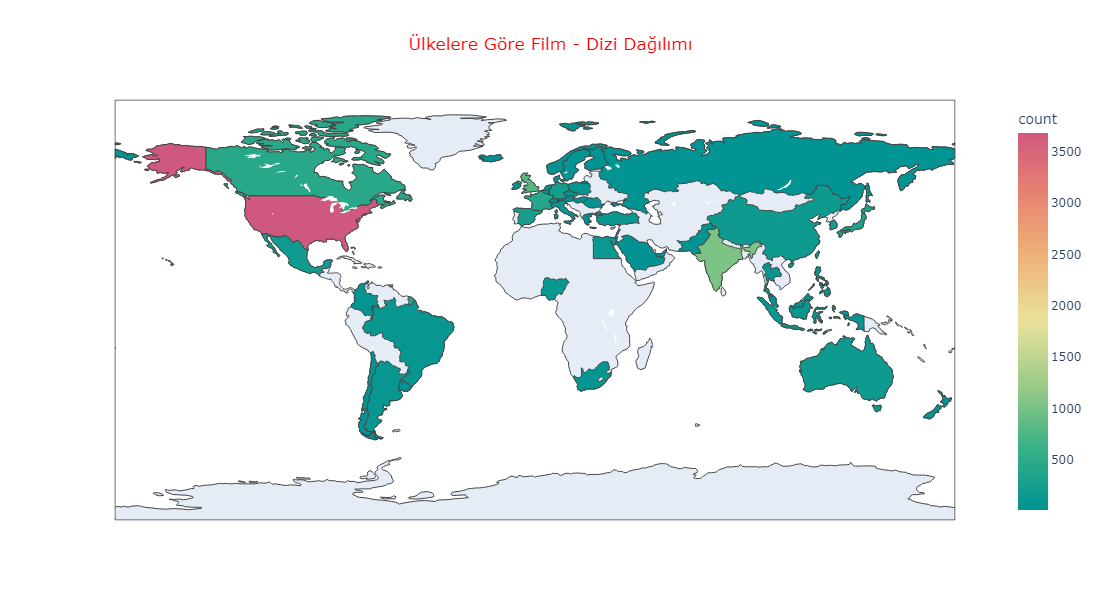

In [71]:
# Ülke verilerini tanımlama
country_data = country_distribution.reset_index()
country_data.columns = ['country', 'count']

# Choropleth haritasını oluşturma
fig = px.choropleth(
    country_data,
    locations='country',
    locationmode='country names',
    color='count',
    hover_name='country',
    color_continuous_scale=px.colors.diverging.Temps,
    title='Distribution of Movies and TV Shows by Country'
)

# Başlığı, rengi ve boyutları güncelleme
fig.update_layout(
    title=dict(text='Ülkelere Göre Film - Dizi Dağılımı', font=dict(color='red')),
    title_x=0.5,  # To center the title
    width=900,
    height=600
)

# Haritayı gösterme
fig.show()

## <font color='indianred'> <b>En Çok Yayınlanan 10 Kategori</b><font color='black'> 

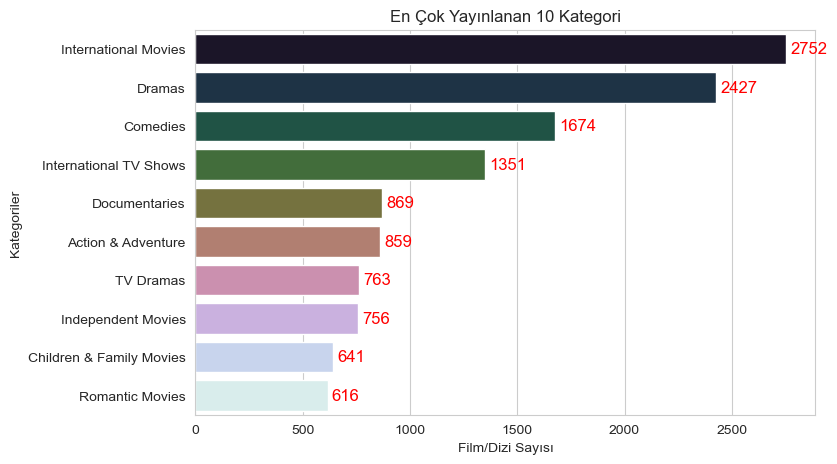

In [73]:
top_categories = df['listed_in'].str.split(',', expand=True).stack().str.strip().value_counts()[:10]
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
ax = sns.barplot(x=top_categories.values, y=top_categories.index, palette="cubehelix")

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12, color='red', padding=3)

ax.set(xlabel='Film/Dizi Sayısı', ylabel='Kategoriler')
plt.title("En Çok Yayınlanan 10 Kategori")

plt.show()

## <font color='indianred'> <b>En Çok Film/Dizi Yöneten 10 Yönetmenin Tür Seçimi Dağılımı</b><font color='black'> 

In [75]:
data = df.copy()
data = data.assign(listed_in=df['listed_in'].str.split(',')).explode('listed_in')
data['listed_in'] = data['listed_in'].str.strip()
director_counts = data['director'].value_counts()
top_20_directors = director_counts[1:11].index
df_top_20 = data[data['director'].isin(top_20_directors)]
grouped_data = df_top_20.groupby(['director', 'listed_in']).size().unstack(fill_value=0)

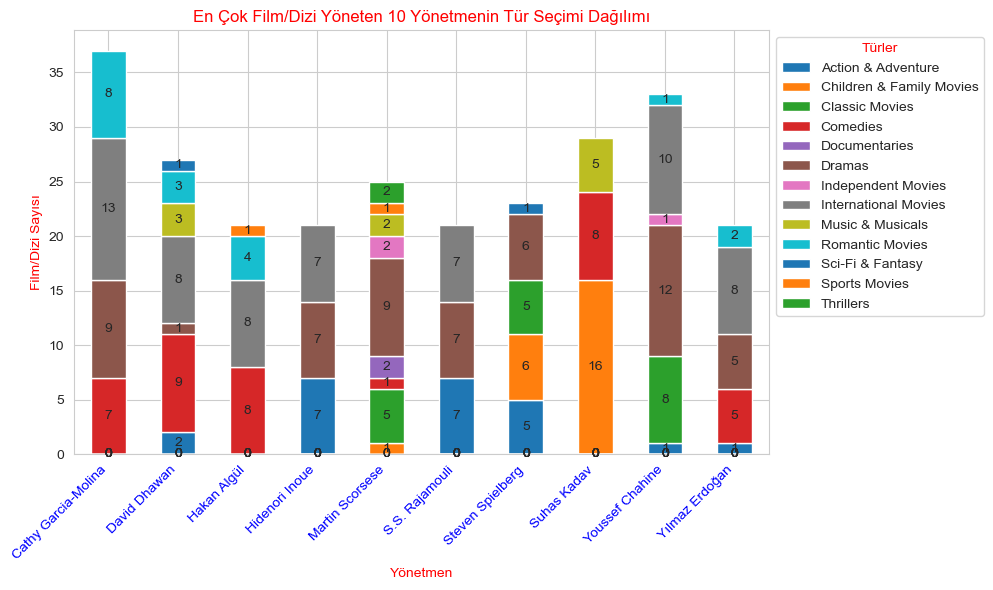

In [76]:
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))

for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=10)

plt.title('En Çok Film/Dizi Yöneten 10 Yönetmenin Tür Seçimi Dağılımı', color='red')
plt.xlabel('Yönetmen', color='red')
plt.ylabel('Film/Dizi Sayısı', color='red')
plt.xticks(rotation=45, ha='right', color='blue')

legend = plt.legend(title='Türler', loc='upper left', bbox_to_anchor=(1, 1))
legend.get_title().set_color('red')

plt.tight_layout()
plt.show()

**Bu proje Netflix platformunun içerik stratejilerini, kullanıcı eğilimlerini ve içeriğin türe göre dağılımını daha iyi anlamamıza yardımcı olmak için hazırlanmıştır.**

<p style="background-color:firebrick;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>TEŞEKKÜRLER!</b></p>